# Demonstration of Predicting ESRB Rating

This is a VERY quick demonstration of loading in data and insepcting data, a few EDA tasks, then trying a machine learning model to predict results. Used for a demonsdtration for the Georgetown Certificate in Data science Cohort 29 in May 2023

The data used for the demo is "Video Game Ratings" by the ESRB it can be downloaded via Kaggle at the link below. The data set is a series of games and whether they have certain explicit content or not (0 or 1). 

<u>Link to the Dataset:</u>

https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb


The quick model test will be for multi-class classification and will attempt to predict the videogame rating.


Video Game Ratings:
- E : Everyone
- E10 : Everyone 10+
- T : Teen
- M : Mature

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data and print the top 20 rows
df = pd.read_csv("Video_games_esrb_rating.csv")
df.head(20)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
7,Blightbound,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,T
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,T


One thing I usually like to do when first looking at tabular data is to see how much missing data we are dealing with.

In [3]:
#show missing values ihn the dataframe
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

Wow, lucky for us someone already cleaned this dataset, there are no nulls. 

Now lets take a look at how many of each category we have using a simple value counts.

In [4]:
# take a look at value counts
df['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

Good to know.A large proportion of games seem to be Teen. 

I will now make a <u>few</u> graphs of the data, just because of time. When doing a normal project, you should thorughly explore your data.


I will start with a correlation matrix. This is a good chart for this dataset as all of our features are either 1 or 0, and we can see what explicit content in video games are usually together/related.

<AxesSubplot:>

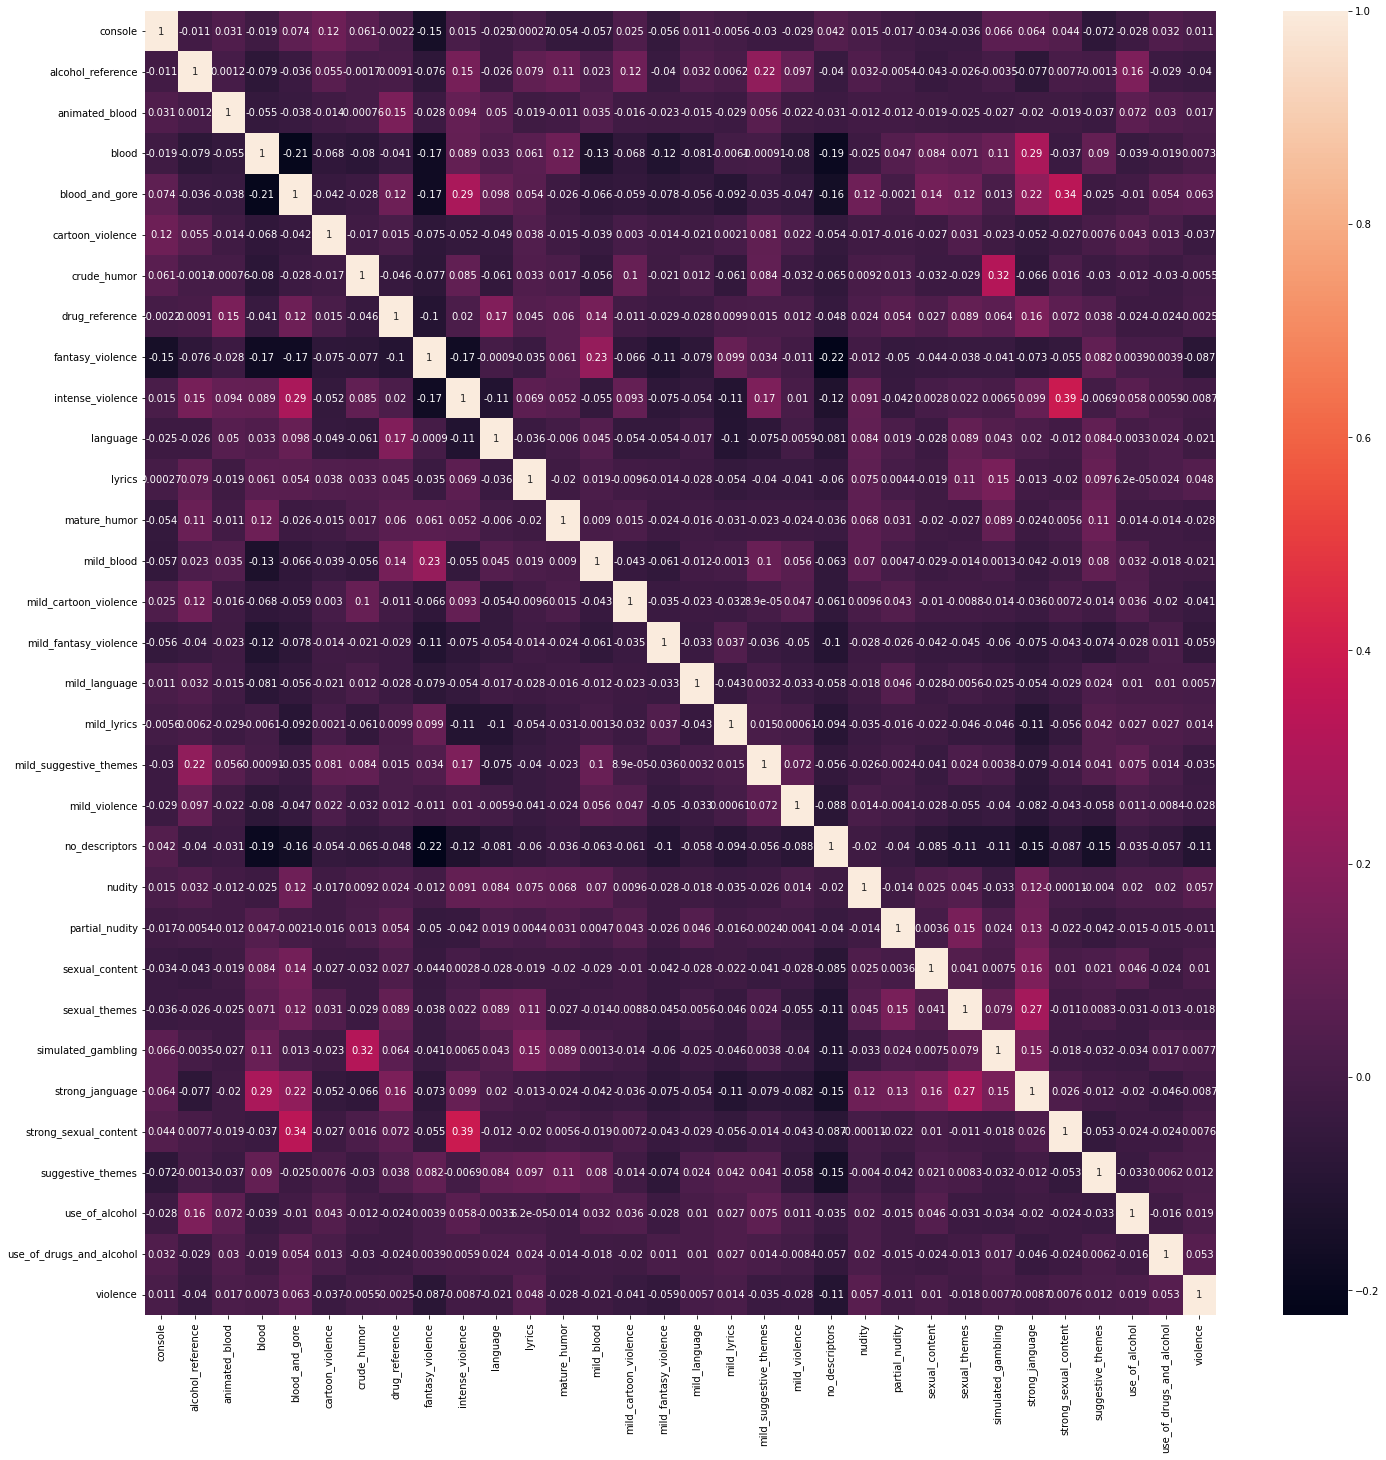

In [5]:
# make a correlation matrix 
plt.rcParams['figure.figsize'] = [24, 24] #adjust the figure size
sns.heatmap(df.corr(), annot=True) #heatmap of the correlation matrix using seaborn

The correlation matrix is pretty interesting! We can see a lot of relationships between different explicit content present in video games. 

Let's now get a few countplots. 

Lets see the "Counts" of the explicit content presence of "Blood":

<AxesSubplot:xlabel='blood', ylabel='count'>

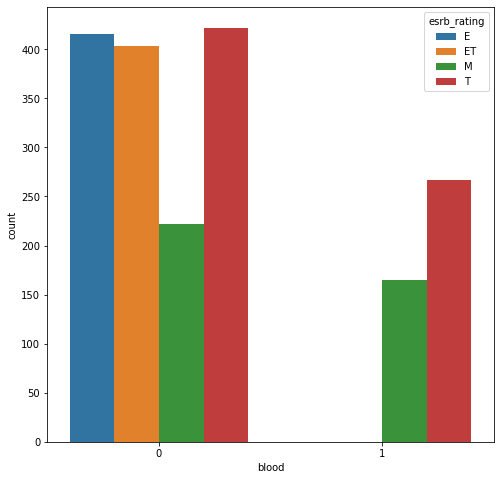

In [6]:
# get countplot 
plt.rcParams['figure.figsize'] = [8, 8]
sns.countplot(data=df, x='blood', hue='esrb_rating')

Let's get one more. Usually I would write a function and look at a lot more but due to the speedy demo i will just do these two.

<AxesSubplot:xlabel='language', ylabel='count'>

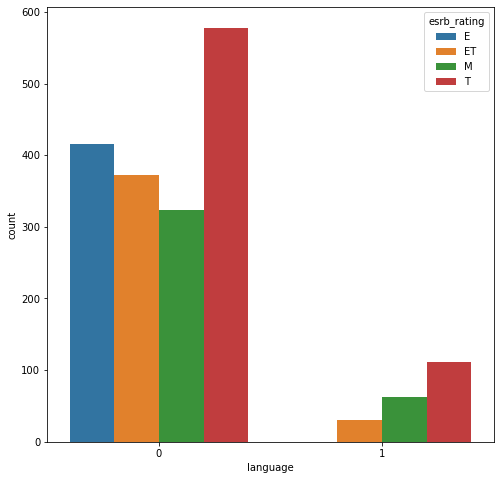

In [7]:
# get countplot of language
plt.rcParams['figure.figsize'] = [8, 8]
sns.countplot(data=df, x='language', hue='esrb_rating')

Okay, so due to time, I am going to switch gears into ML now. That was nowhere near enough EDA for a real project, but again this is just a demo. 

I will first create an X (predicotrs basically) and a y (the label) from the original dataframe. 

I will also drop the columns 'title' and 'console' because they are not relevant for prediction and are not the game's content. 

In [8]:
X = df.drop(columns=['title', 'console',  'esrb_rating'], axis=1)
y = df['esrb_rating']

Now that we have an X and y, I write a very quick simple function to split the data into a train and test data set using sklearn's train_test_split function. We will set 20% of the data aside for testing using "test_size=0.2".

In [9]:
from sklearn.model_selection import train_test_split

def split_data(X, y, randomseed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test 

In [10]:
#lets split the data now
X_train, X_test, y_train, y_test = split_data(X, y, 42)
X_train #take a look at X_train

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
181,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1851,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1286,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Okay, now I will import a simple decision tree classifier from sklearn and train the model on the trianing dataset (X_Train, y_train). I then have the model predict "new predictions" on the test data set (X_test) and print out the predictions

In [11]:
from sklearn.tree import DecisionTreeClassifier

modeltotry = DecisionTreeClassifier().fit(X_train, y_train)
modelpredictions = modeltotry.predict(X_test) #model preictions is the actual ML predictions in an np array
modelpredictions

array(['E', 'T', 'E', 'M', 'E', 'M', 'T', 'M', 'E', 'E', 'E', 'E', 'ET',
       'E', 'M', 'T', 'T', 'ET', 'M', 'T', 'M', 'T', 'T', 'T', 'M', 'E',
       'ET', 'ET', 'E', 'T', 'E', 'E', 'T', 'M', 'M', 'M', 'E', 'T', 'E',
       'E', 'T', 'T', 'E', 'ET', 'ET', 'E', 'E', 'M', 'T', 'ET', 'ET',
       'E', 'E', 'T', 'M', 'M', 'E', 'T', 'E', 'T', 'E', 'T', 'T', 'M',
       'E', 'E', 'ET', 'T', 'E', 'M', 'M', 'ET', 'ET', 'ET', 'ET', 'E',
       'E', 'T', 'E', 'T', 'ET', 'T', 'E', 'E', 'E', 'E', 'E', 'E', 'ET',
       'E', 'M', 'ET', 'E', 'M', 'T', 'E', 'T', 'ET', 'M', 'M', 'T', 'E',
       'E', 'E', 'E', 'T', 'M', 'ET', 'ET', 'E', 'M', 'E', 'ET', 'ET',
       'M', 'E', 'M', 'M', 'T', 'ET', 'M', 'E', 'T', 'ET', 'ET', 'T', 'T',
       'ET', 'M', 'E', 'ET', 'E', 'T', 'E', 'T', 'ET', 'ET', 'ET', 'M',
       'T', 'T', 'M', 'T', 'T', 'M', 'T', 'E', 'M', 'ET', 'M', 'E', 'T',
       'T', 'E', 'E', 'ET', 'T', 'E', 'E', 'T', 'M', 'T', 'T', 'T', 'E',
       'ET', 'T', 'E', 'T', 'E', 'E', 'T', 'E', 'M', 

What I printed above are actual model predictions. We have real machine learning predictions already!

How did the model do? Let's get a confusion matrix from sklearn's confusion_matrix function. We feed this confusion_matrix method the true labels (y_test) and the predicted labels (modelpredictions)

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, modelpredictions)

array([[101,   3,   0,   0],
       [  3,  63,   1,   7],
       [  0,   1,  64,   8],
       [  4,  15,  11,  98]], dtype=int64)

Okay, it gave us a confusion matrix but it is not too pretty. I quickly look up we can make this look better from sklearns ConfusionMatrixDisplay.

I basically follow the documentation's example exactly.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

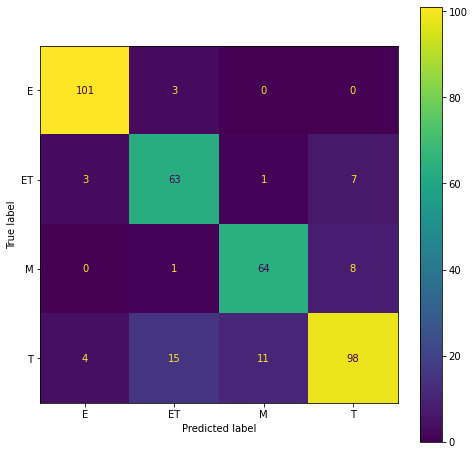

In [13]:
cm = confusion_matrix(y_test, modelpredictions, labels=modeltotry.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltotry.classes_)
disp.plot()
plt.show()

Let's now see a few basic model metrics. You probably remember them from class: accuracy, precision and recall (there are more ways to evaluate model performance but we just do these for this speed demo). We basically improt the sklearn metrics and call them by feeding the functions y_true (y_test) and the predictions (modelpredictions).

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [15]:
print("Model accuracy:")
print(accuracy_score(y_test, modelpredictions))
print("Model precision:")
print(precision_score(y_test, modelpredictions, average='macro'))
print("Model recall:")
print(recall_score(y_test, modelpredictions, average='macro'))

Model accuracy:
0.8601583113456465
Model precision:
0.8532099421095127
Model recall:
0.8662106315680802


Not horrible for a speed run. Let's try one more model: a random  forest classifier. I am just going to copy and paste the same way I did the decision tree.

Random forest classifer confusion matrix:


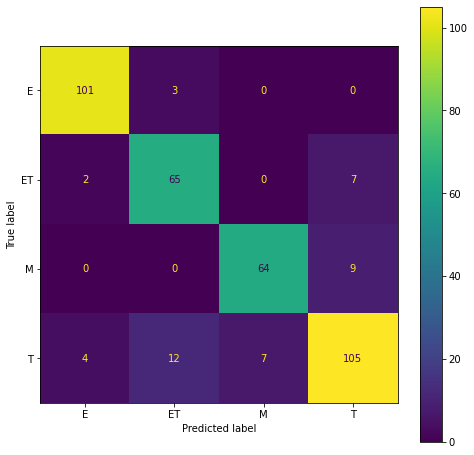

In [16]:
from sklearn.ensemble import RandomForestClassifier


modeltotry = RandomForestClassifier().fit(X_train, y_train)
modelpredictions = modeltotry.predict(X_test)
cm = confusion_matrix(y_test, modelpredictions, labels=modeltotry.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltotry.classes_)
disp.plot()
print("Random forest classifer confusion matrix:")
plt.show()

And now some Random Forest Classifer metrics:

In [17]:
print("Model accuracy:")
print(accuracy_score(y_test, modelpredictions))
print("Model precision:")
print(precision_score(y_test, modelpredictions, average='macro'))
print("Model recall:")
print(recall_score(y_test, modelpredictions, average='macro'))

Model accuracy:
0.8839050131926122
Model precision:
0.8814005698476018
Model recall:
0.886639263324837


It seems like the random forest classifer did slightly better! Normally we are far from done, but that will conclude this "quick" demo!

## Some Final Thoughts

This was basically just a machine learning speedrun. Normally, EDA, modeling, feture selection, etc. can (and probably should) be their own subdirectories within a repository. Another note is that a lot of the things I did here should be in functions in a full project, as we should try many models. We should also cross validate each model with multiple train_test_splits to verify each of the models' performance. There are tons of other EDA and transformations I could do here but due to lack of time in the demo this evening, this will be it for now. At least we got some good predictions going! 


Best of luck as you continue to work on your capstones, and feel free ot reach out to me for any other questions!

-Ben